In [4]:
!pip install opendatasets


In [5]:
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/crawford/emnist?spm=5aebb161.1ca17685.0.0.93b17b18PwqJQ6")

Skipping, found downloaded files in "./emnist" (use force=True to force download)


In [7]:
import os

# List all files in the directory
directory_path = '/content/emnist'
print(os.listdir(directory_path))

['emnist-letters-train.csv', 'emnist-bymerge-mapping.txt', 'emnist-balanced-mapping.txt', 'emnist-balanced-train.csv', 'emnist-mnist-test.csv', 'emnist-byclass-mapping.txt', 'emnist-bymerge-test.csv', 'emnist-digits-train.csv', 'emnist-letters-mapping.txt', 'emnist-byclass-test.csv', 'emnist-digits-mapping.txt', 'emnist-mnist-mapping.txt', 'emnist-letters-test.csv', 'emnist-bymerge-train.csv', 'emnist-byclass-train.csv', 'emnist-mnist-train.csv', 'emnist-balanced-test.csv', 'emnist_source_files', 'emnist-digits-test.csv']


In [8]:
import pandas as pd

# Load the dataset
file_path = '/content/emnist/emnist-balanced-train.csv'
data = pd.read_csv(file_path, header=None)

# Separate features (pixels) and labels
labels = data.iloc[:, 0]  # First column contains the labels
features = data.iloc[:, 1:]  # Remaining columns are pixel values

In [9]:
print(labels)

0         45
1         36
2         43
3         15
4          4
          ..
112795    22
112796    17
112797    23
112798    31
112799     8
Name: 0, Length: 112800, dtype: int64


In [10]:
print(features)

        1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
112795    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112796    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112797    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112798    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
112799    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  7

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.33,random_state=42)

In [13]:
#Standard(0,1)
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=0.95,random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [28]:
# Check the number of components retained
print(f"Number of components retained: {pca.n_components_}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.4f}")

Number of components retained: 10
Explained variance ratio: 0.3178


In [29]:
logreg_pca = LogisticRegression(max_iter = 1200,random_state=42)

In [31]:
logreg_pca.fit(X_train_pca,y_train)

LogisticRegression(max_iter=1200, random_state=42)

In [32]:
y_pred_pca = logreg_pca.predict(X_test_pca)

In [25]:
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")

Accuracy with PCA: 0.6921


##**Without PCA**

In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression without PCA
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred = logreg.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {accuracy_without_pca:.4f}")

Accuracy without PCA: 0.6575


In [33]:
print(f"Accuracy without PCA: {accuracy_without_pca:.4f}")
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")

Accuracy without PCA: 0.6575
Accuracy with PCA: 0.6921


In [34]:
# Try different numbers of components
for n in [10, 50, 100, 200]:
    pca = PCA(n_components=n, random_state=42)
    pca.fit(X_train_scaled)
    print(f"Components: {n}, Explained Variance: {sum(pca.explained_variance_ratio_):.4f}")

Components: 10, Explained Variance: 0.3178
Components: 50, Explained Variance: 0.6680
Components: 100, Explained Variance: 0.8240
Components: 200, Explained Variance: 0.9378


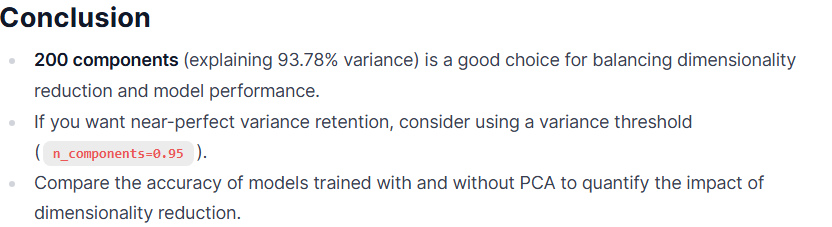

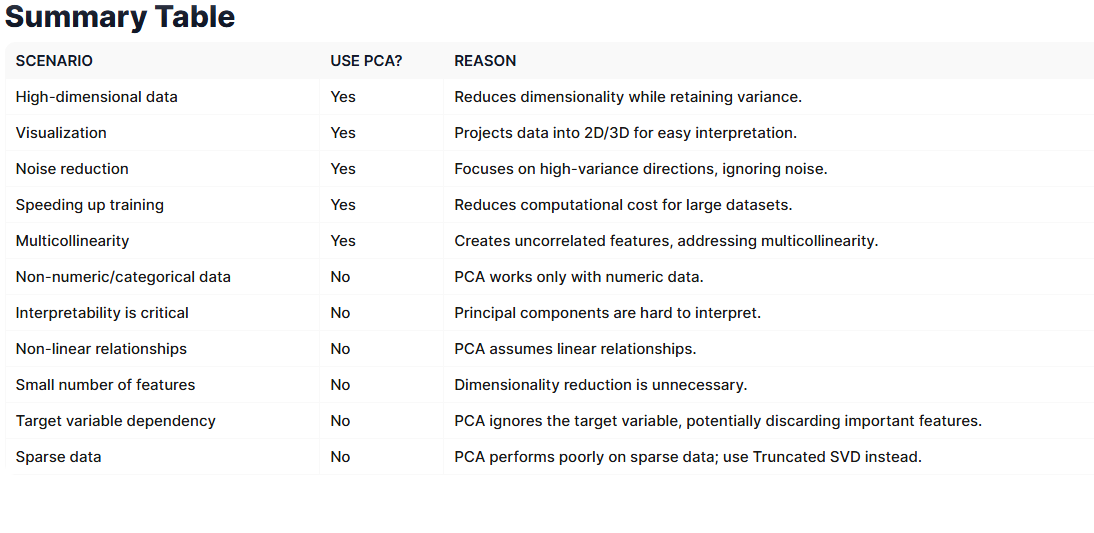